## EX-1 N QUEENS PROBLEM

In [ ]:
def isSafe(mat, r, c):
    # Check if any queen is in the same column
    for i in range(r):
        if mat[i][c] == 'Q':
            return False

    # Check upper-left diagonal
    (i, j) = (r, c)
    while i >= 0 and j >= 0:
        if mat[i][j] == 'Q':
            return False
        i = i - 1
        j = j - 1

    # Check upper-right diagonal
    (i, j) = (r, c)
    while i >= 0 and j < len(mat):
        if mat[i][j] == 'Q':
            return False
        i = i - 1
        j = j + 1

    return True


def printSolution(mat):
    for r in mat:
        print(' '.join(r))
    print()


def nQueen(mat, r):
    # Base case: All queens are placed
    if r == len(mat):
        printSolution(mat)
        return

    # Try placing queen in each column of the current row
    for i in range(len(mat)):
        if isSafe(mat, r, i):
            mat[r][i] = 'Q'  # Place queen
            nQueen(mat, r + 1)  # Recur for the next row
            mat[r][i] = '–'  # Backtrack


if __name__ == '__main__':
    N = int(input("Enter the number of Queens you want: "))
    mat = [['–' for x in range(N)] for y in range(N)]
    nQueen(mat, 0)

Enter the number of Queens you want: 4
– Q – –
– – – Q
Q – – –
– – Q –

– – Q –
Q – – –
– – – Q
– Q – –



# EX-2 DEPTH FIRST SEARCH

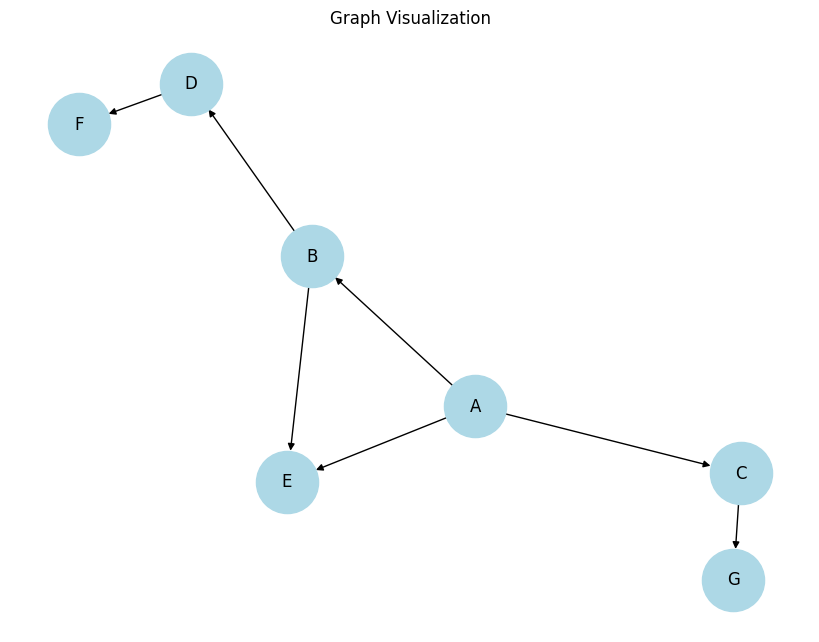

Following is DFS from (starting from vertex A):
A B D F E C G 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# FUNCTION TO SOLVE DFS
def solveDFS(graph, v, visited):
    visited.add(v)  # Mark the current node as visited
    print(v, end=' ')  # Print the current node

    for neighbour in graph.neighbors(v):  # Iterate through the neighbors of the current node
        if neighbour not in visited:  # Visit unvisited neighbors
            solveDFS(graph, neighbour, visited)

# CREATE A GRAPH USING NETWORKX
g = nx.DiGraph()  # Create a directed graph
g.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('C', 'G'),
    ('B', 'D'), ('B', 'E'), ('D', 'F'), ('A', 'E')
])  # Add edges for the graph

# GRAPH VISUALIZATION
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
nx.draw(g, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_color='black')
plt.title("Graph Visualization")
plt.show()

# SOLVE DFS FOR THE GRAPH
print("Following is DFS from (starting from vertex A):")
visited = set()  # Create a set to keep track of visited nodes
solveDFS(g, 'A', visited)


# EX-3 DEPTH FIRST SEARCH (WATER JUG)

Solution steps:
(0, 0)
(3, 0)
(3, 5)
(0, 5)
(3, 2)
(0, 2)
(2, 0)
(2, 5)
(3, 4)


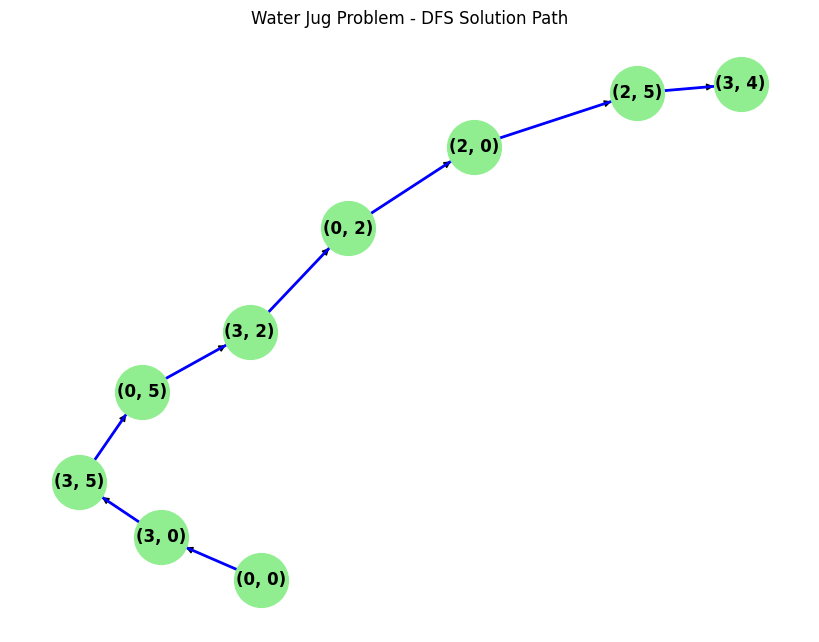

In [ ]:
# Function to perform DFS to solve the water jug problem
def water_jug_dfs(capacity1, capacity2, target):
    visited = set()  # To track visited states
    path = []  # To store the solution path

    def dfs(jug1, jug2):
        # If we have already visited this state, return False (avoid cycles)
        if (jug1, jug2) in visited:
            return False

        # Mark the state as visited
        visited.add((jug1, jug2))

        # Append the current state to the path
        path.append((jug1, jug2))

        # If the target is achieved in either jug, return True
        if jug1 == target or jug2 == target:
            return True

        # Explore all possible transitions (DFS recursive calls)
        # Fill 3-liter jug
        if dfs(3, jug2):
            return True
        # Fill 5-liter jug
        if dfs(jug1, 5):
            return True
        # Empty 3-liter jug
        if dfs(0, jug2):
            return True
        # Empty 5-liter jug
        if dfs(jug1, 0):
            return True
        # Pour water from 3-liter jug into 5-liter jug
        if dfs(max(0, jug1 - (5 - jug2)), min(5, jug1 + jug2)):
            return True
        # Pour water from 5-liter jug into 3-liter jug
        if dfs(min(3, jug1 + jug2), max(0, jug2 - (3 - jug1))):
            return True

        # If none of the transitions lead to the goal, backtrack
        path.pop()
        return False

    # Start DFS from the initial state (0, 0)
    dfs(0, 0)

    # If we found a solution, return the path
    return path

# Example Usage
capacity1 = 3  # Capacity of the 3-liter jug
capacity2 = 5  # Capacity of the 5-liter jug
target = 4     # Target amount to measure

solution = water_jug_dfs(capacity1, capacity2, target)

if solution:
    print("Solution steps:")
    for step in solution:
        print(step)
else:
    print("No solution found.")

import matplotlib.pyplot as plt
import networkx as nx

# Function to create and visualize the state space transitions for DFS
def visualize_dfs_solution(solution):
    G = nx.DiGraph()

    # Add the nodes and edges based on the DFS solution path
    for i in range(len(solution) - 1):
        G.add_edge(solution[i], solution[i + 1])

    pos = nx.spring_layout(G)  # Position the nodes for visualization

    plt.figure(figsize=(8, 6))

    # Draw the graph with nodes and labels
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='blue', width=2)

    plt.title("Water Jug Problem - DFS Solution Path")
    plt.show()

# Visualize the DFS solution
if solution:
    visualize_dfs_solution(solution)

# EX -4 MINIMAX PROBLEM


In [ ]:
# A simple Python3 program to find
# maximum score that
# maximizing player can get
import math

def minimax (curDepth, nodeIndex,
			maxTurn, scores,
			targetDepth):

	# base case : targetDepth reached
	if (curDepth == targetDepth):
		return scores[nodeIndex]

	if (maxTurn):
		return max(minimax(curDepth + 1, nodeIndex * 2,
					False, scores, targetDepth),
				minimax(curDepth + 1, nodeIndex * 2 + 1,
					False, scores, targetDepth))

	else:
		return min(minimax(curDepth + 1, nodeIndex * 2,
					True, scores, targetDepth),
				minimax(curDepth + 1, nodeIndex * 2 + 1,
					True, scores, targetDepth))

# Driver code
scores = [3, 5, 2, 9, 12, 5, 23, 23]

treeDepth = math.log(len(scores), 2)

print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

# This code is contributed
# by rootshadow


The optimal value is : 12


# EX -5 A * SEARCH PROBLEM

In [ ]:
import heapq

ROW, COL = 9, 10

def is_valid(row, col):
    return 0 <= row < ROW and 0 <= col < COL

def is_unblocked(grid, row, col):
    return grid[row][col] == 1

def is_destination(row, col, dest):
    return (row, col) == dest

def calculate_h_value(row, col, dest):
    return ((row - dest[0])**2 + (col - dest[1])**2)**0.5

def trace_path(parent, dest):
    path = []
    while dest in parent:
        path.append(dest)
        dest = parent[dest]
    print("Path:", " -> ".join(map(str, path[::-1])))

def a_star_search(grid, src, dest):
    if not (is_valid(*src) and is_valid(*dest)):
        print("Invalid source or destination")
        return
    if not (is_unblocked(grid, *src) and is_unblocked(grid, *dest)):
        print("Source or destination blocked")
        return

    open_list = [(0, src)]
    parent = {}
    g_score = {src: 0}

    while open_list:
        _, current = heapq.heappop(open_list)

        if is_destination(*current, dest):
            trace_path(parent, dest)
            return

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if is_valid(*neighbor) and is_unblocked(grid, *neighbor):
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + calculate_h_value(*neighbor, dest)
                    heapq.heappush(open_list, (f_score, neighbor))
                    parent[neighbor] = current

    print("Path not found")

# Driver code
if __name__ == "__main__":
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
    ]
    src = (8, 0)
    dest = (0, 0)
    a_star_search(grid, src, dest)


Path: (7, 0) -> (6, 0) -> (5, 0) -> (4, 1) -> (3, 2) -> (2, 1) -> (1, 0) -> (0, 0)


## EX-6 PROLOG

In [ ]:
def prolog_response(result):
    if result is True:
        return "true."
    elif result is False:
        return "false."
    else:
        return f"ERROR: Unknown procedure: {result}"


def kb1():
    print("?- woman(mia).")
    print(prolog_response("mia" in {"mia", "jody", "yolanda"}))

    print("?- playsAirGuitar(mia).")
    print(prolog_response("mia" in {"jody"}))

    print("?- party.")
    print(prolog_response(True))

    print("?- concert.")
    print(prolog_response("concert"))

kb1()


def kb2():
    happy = {"yolanda"}
    listens_to_music = {"mia"}

    if "yolanda" in happy:
        listens_to_music.add("yolanda")

    plays_air_guitar = set()
    if "mia" in listens_to_music:
        plays_air_guitar.add("mia")
    if "yolanda" in listens_to_music:
        plays_air_guitar.add("yolanda")

    print("KB2 Plays Air Guitar:", plays_air_guitar)

kb2()


def kb3():
    likes = {
        ("dan", "sally"),
        ("sally", "dan"),
        ("john", "brittney")
    }

    def married(x, y):
        return (x, y) in likes and (y, x) in likes

    def friends(x, y):
        return (x, y) in likes or (y, x) in likes

    print("KB3 Married (Dan, Sally):", married("dan", "sally"))
    print("KB3 Friends (John, Brittney):", friends("john", "brittney"))

kb3()


def kb4():
    foods = {"burger", "sandwich", "pizza"}
    lunch = "sandwich"
    dinner = "pizza"

    def is_food(item):
        return item in foods

    print("KB4 Is Burger Food?:", is_food("burger"))
    print("KB4 Is Sandwich Food?:", is_food("sandwich"))
    print("KB4 Is Pizza Food?:", is_food("pizza"))

kb4()


def kb5():
    owns = {
        "jack": "car(bmw)",
        "john": "car(chevy)",
        "olivia": "car(civic)",
        "jane": "car(chevy)"
    }
    sedan = {"car(bmw)", "car(civic)"}
    truck = {"car(chevy)"}

    def is_sedan(car):
        return car in sedan

    def is_truck(car):
        return car in truck

    print("KB5 Jack owns a sedan:", is_sedan(owns["jack"]))
    print("KB5 John owns a truck:", is_truck(owns["john"]))
    print("KB5 Olivia owns a sedan:", is_sedan(owns["olivia"]))

kb5()

?- woman(mia).
true.
?- playsAirGuitar(mia).
false.
?- party.
true.
?- concert.
ERROR: Unknown procedure: concert
KB2 Plays Air Guitar: {'yolanda', 'mia'}
KB3 Married (Dan, Sally): True
KB3 Friends (John, Brittney): True
KB4 Is Burger Food?: True
KB4 Is Sandwich Food?: True
KB4 Is Pizza Food?: True
KB5 Jack owns a sedan: True
KB5 John owns a truck: True
KB5 Olivia owns a sedan: True


# EX-7 INTRODUCTION TO PROLOG

In [ ]:
male = {"peter", "john", "chris", "kevin"}
female = {"betty", "jeny", "lisa", "helen"}
parentOf = {
    ("chris", "peter"),
    ("chris", "betty"),
    ("helen", "peter"),
    ("helen", "betty"),
    ("kevin", "chris"),
    ("kevin", "lisa"),
    ("jeny", "john"),
    ("jeny", "helen")
}


def prolog_response(result):
    if result:
        return "true."
    else:
        return "false."


def father(x, y):
    return y in male and (x, y) in parentOf

def mother(x, y):
    return y in female and (x, y) in parentOf

def grandfather(x, y):
    for z in parentOf:
        if (x, z[0]) in parentOf and (z[0], y) in parentOf and z[0] in male:
            return True
    return False

def grandmother(x, y):
    for z in parentOf:
        if (x, z[0]) in parentOf and (z[0], y) in parentOf and z[0] in female:
            return True
    return False

def brother(x, y):
    for z in parentOf:
        if y in male and (x, z[1]) in parentOf and (y, z[1]) in parentOf:
            return True
    return False

def sister(x, y):
    for z in parentOf:
        if y in female and (x, z[1]) in parentOf and (y, z[1]) in parentOf:
            return True
    return False


print("?- father('chris', 'peter').")
print(prolog_response(father("chris", "peter")))

print("?- mother('helen', 'peter').")
print(prolog_response(mother("helen", "peter")))

print("?- grandfather('kevin', 'peter').")
print(prolog_response(grandfather("kevin", "peter")))

print("?- grandmother('jeny', 'helen').")
print(prolog_response(grandmother("jeny", "helen")))

print("?- brother('peter', 'betty').")
print(prolog_response(brother("peter", "betty")))

print("?- sister('betty', 'peter').")
print(prolog_response(sister("betty", "peter")))

?- father('chris', 'peter').
true.
?- mother('helen', 'peter').
false.
?- grandfather('kevin', 'peter').
true.
?- grandmother('jeny', 'helen').
false.
?- brother('peter', 'betty').
false.
?- sister('betty', 'peter').
false.


# EX-8 UNIFICATION AND RESOLUTION

In [ ]:
warm = True
raining = True
sunny = True

def wet():
    return raining

def enjoy():
    return sunny and warm

def strawberry_picking():
    return warm and not raining

def notstrawberry_picking():
    return raining


def prolog_response(result):
    if result:
        return "true."
    else:
        return "false."


print("?- enjoy.")
print(prolog_response(enjoy()))

print("?- strawberry_picking.")
print(prolog_response(strawberry_picking()))

print("?- notstrawberry_picking.")
print(prolog_response(notstrawberry_picking()))

print("?- wet.")
print(prolog_response(wet()))

?- enjoy.
true.
?- strawberry_picking.
false.
?- notstrawberry_picking.
true.
?- wet.
true.


# EX-9 FUZZY LOGIC (IMAGE PROCESSING)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


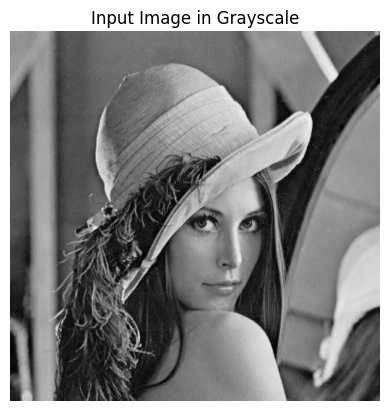

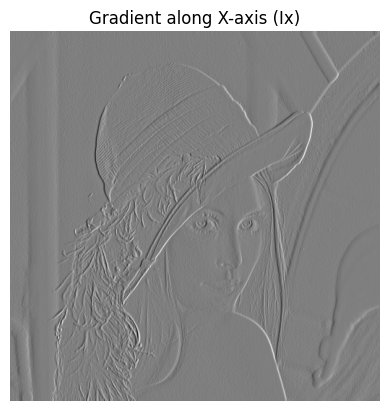

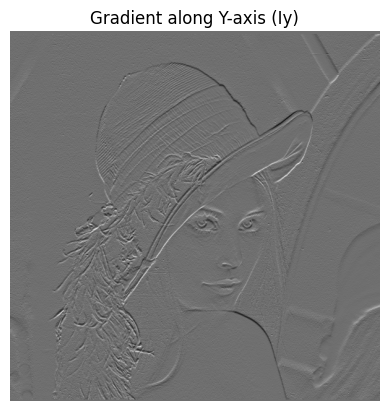

KeyboardInterrupt: 

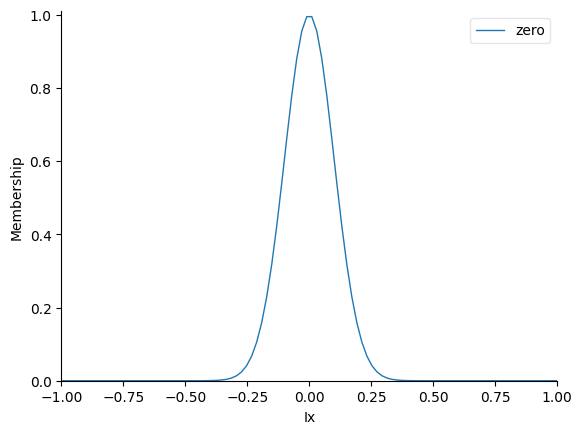

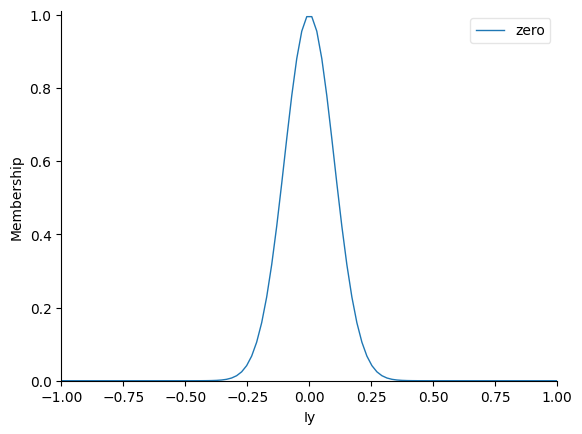

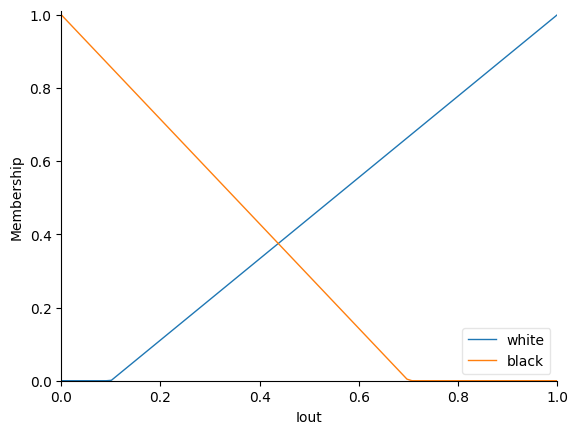

In [ ]:
!pip install scikit-image scikit-fuzzy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from scipy.ndimage import convolve
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load an example image
image_rgb = io.imread('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')

# Convert to grayscale
image_gray = color.rgb2gray(image_rgb)
plt.figure()
plt.imshow(image_gray, cmap='gray')
plt.title('Input Image in Grayscale')
plt.axis('off')
plt.show()

image_double = img_as_float(image_gray)

# Define gradient filters
Gx = np.array([[-1, 1]])
Gy = np.array([[-1], [1]])

# Convolve to get gradients
Ix = convolve(image_double, Gx, mode='reflect')
Iy = convolve(image_double, Gy, mode='reflect')

# Display gradients
plt.figure()
plt.imshow(Ix, cmap='gray')
plt.title('Gradient along X-axis (Ix)')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(Iy, cmap='gray')
plt.title('Gradient along Y-axis (Iy)')
plt.axis('off')
plt.show()

# Create fuzzy variables
Ix_fuzzy = ctrl.Antecedent(np.linspace(-1, 1, 100), 'Ix')
Iy_fuzzy = ctrl.Antecedent(np.linspace(-1, 1, 100), 'Iy')
Iout_fuzzy = ctrl.Consequent(np.linspace(0, 1, 100), 'Iout')

# Define membership functions
Ix_fuzzy['zero'] = fuzz.gaussmf(Ix_fuzzy.universe, 0, 0.1)
Iy_fuzzy['zero'] = fuzz.gaussmf(Iy_fuzzy.universe, 0, 0.1)
Iout_fuzzy['white'] = fuzz.trimf(Iout_fuzzy.universe, [0.1, 1, 1])
Iout_fuzzy['black'] = fuzz.trimf(Iout_fuzzy.universe, [0, 0, 0.7])

# Plot membership functions
Ix_fuzzy.view()
Iy_fuzzy.view()
Iout_fuzzy.view()

rule1 = ctrl.Rule(Ix_fuzzy['zero'] & Iy_fuzzy['zero'], Iout_fuzzy['white'])
rule2 = ctrl.Rule(~(Ix_fuzzy['zero'] & Iy_fuzzy['zero']), Iout_fuzzy['black'])

# Create control system
edge_detection_ctrl = ctrl.ControlSystem([rule1, rule2])
edge_detection = ctrl.ControlSystemSimulation(edge_detection_ctrl)

edge_image = np.zeros_like(image_double)
for i in range(Ix.shape[0]):
    for j in range(Ix.shape[1]):
        edge_detection.input['Ix'] = Ix[i, j]
        edge_detection.input['Iy'] = Iy[i, j]
        edge_detection.compute()
        edge_image[i, j] = edge_detection.output['Iout']

# Display original and edge-detected images
plt.figure()
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Detection Using Fuzzy Logic')
plt.axis('off')
plt.show()

EX-10 IMPLEMENTING ARTIFICIAL NEURAL NETWORKS FOR AN
APPLICATION USING PYTHON - CLASSIFICATION


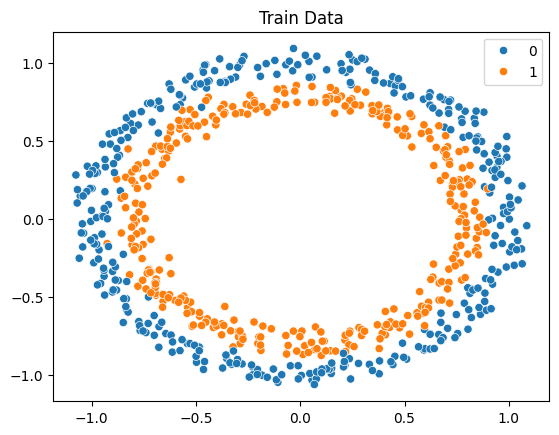

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 Score for Training Data = 0.9842857142857143
R2 Score for Test Data = 0.98


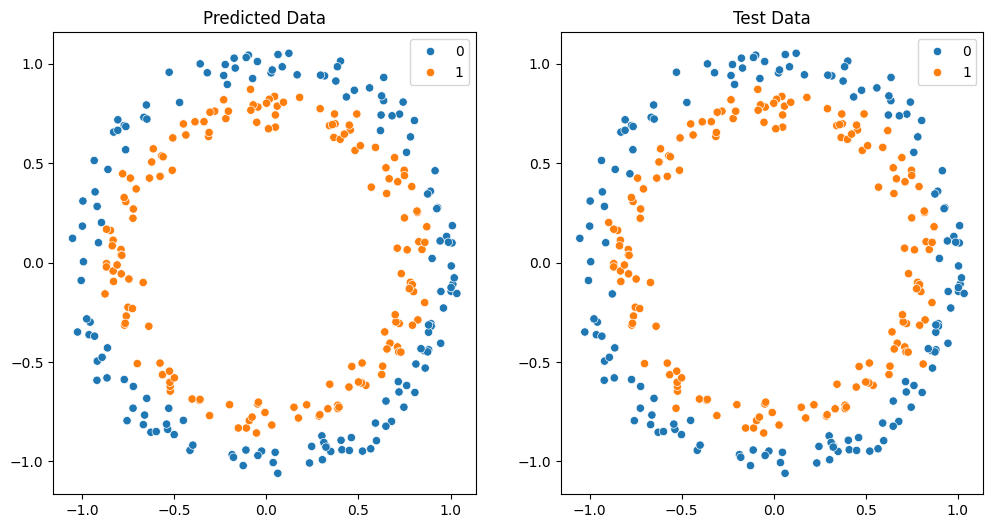

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generate dataset
X, y = make_circles(n_samples=1000, noise=0.05)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the training data
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title("Train Data")
plt.show()

# Initialize and train the MLP model
clf = MLPClassifier(max_iter=1000)
clf.fit(X_train, y_train)

# Print R2 Scores
print(f"R2 Score for Training Data = {clf.score(X_train, y_train)}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test)}")

# Predict on test data
y_pred = clf.predict(X_test)

# Visualize the test data and predictions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, ax=ax[0])
ax[0].set_title("Predicted Data")

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, ax=ax[1])
ax[1].set_title("Test Data")

plt.show()


EX-11 IMPLEMENTING ARTIFICIAL NEURAL NETWORKS FOR AN
APPLICATION USING PYTHON - REGRESSION

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generate a regression dataset
X, y = make_regression(n_samples=1000, noise=0.05, n_features=100)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Initialize and fit the model
clf = MLPRegressor(max_iter=1000)
clf.fit(X_train, y_train)

# Print R2 Scores
print(f"R2 Score for Training Data = {clf.score(X_train, y_train)}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test)}")

R2 Score for Training Data = 0.9999218957021331
R2 Score for Test Data = 0.9757577173636593


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# EX-12 DECISION TREE CLASSIFICATION

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('/content/gdrive/My Drive/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values  # Features: Age and EstimatedSalary
y = dataset.iloc[:, -1].values  # Target variable: Purchased

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid for plotting decision boundaries
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Plot decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the points on the graph
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# EX-13 IMPLEMENTATION OF DECISION TREE CLASSIFICATION TECHNIQUES

In [ ]:
from sklearn import tree

# Using DecisionTreeClassifier for prediction
clf = tree.DecisionTreeClassifier()

# Training data: [height, weight, shoe size]
X = [
    [181, 80, 91], [182, 90, 92], [183, 100, 92], [184, 200, 93], [185, 300, 94],
    [186, 400, 95], [187, 500, 96], [189, 600, 97], [190, 700, 98], [191, 800, 99],
    [192, 900, 100], [193, 1000, 101]
]

# Labels: gender
Y = ['male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male']

# Training the model
clf = clf.fit(X, Y)

# Making predictions
predictionf = clf.predict([[181, 80, 91]])  # Example 1
predictionm = clf.predict([[183, 100, 92]])  # Example 2

# Printing final predictions
print(f"Prediction for [181, 80, 91]: {predictionf[0]}")
print(f"Prediction for [183, 100, 92]: {predictionm[0]}")


Prediction for [181, 80, 91]: male
Prediction for [183, 100, 92]: female


# EX-14 IMPLEMENTATION OF CLUSTERING TECHNIQUES K - MEANS

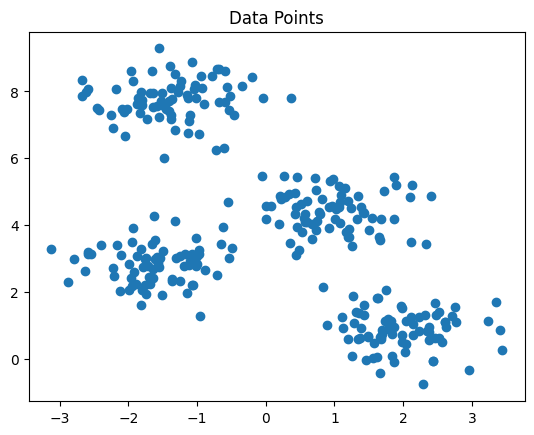

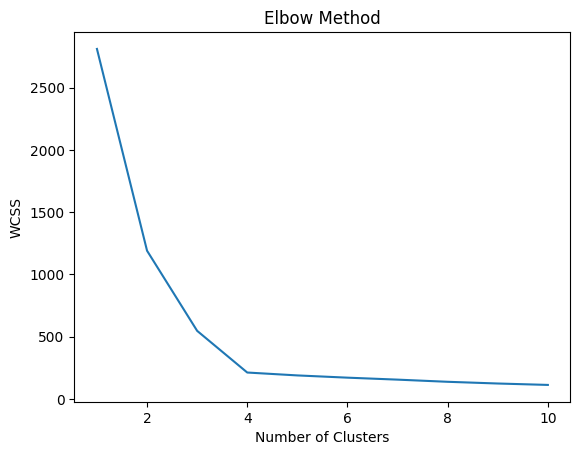

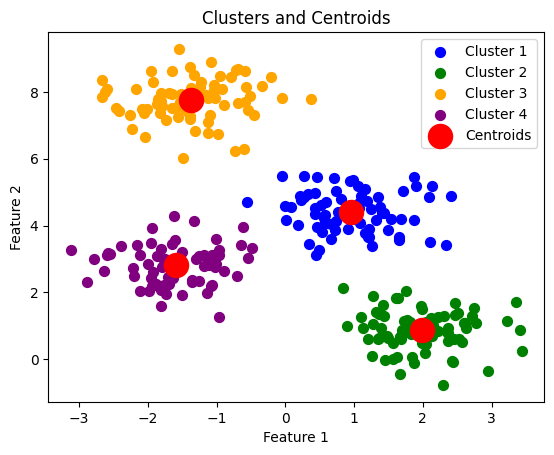

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1])
plt.title('Data Points')
plt.show()

# Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans to the dataset with optimal clusters (4 in this case)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[pred_y == 2, 0], X[pred_y == 2, 1], s=50, c='orange', label='Cluster 3')
plt.scatter(X[pred_y == 3, 0], X[pred_y == 3, 1], s=50, c='purple', label='Cluster 4')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
